# Stochastic Gradient Descent
## Problem A

$$\nabla l^{logist}(y_{w}, (x, t)) = \nabla ln(1+e^{-t<w,x>})$$
$$= (-tx)\frac{e^{-t<w,x>}}{1+e^{-t<w,x>}}$$
$$= (-tx)\frac{1}{\frac{1}{e^{-t<w,x>}} + 1}$$
$$= (-tx)\frac{1}{e^{t<w,x>} + 1}$$

## Problem B

SGD with respect to the logistic loss:

$$w^{i+1}= w^{i}+(tx)\frac{\eta}{e^{t<w,x>} + 1}$$

where $\eta$ is a fixed stepsize.

Hence, the pseudo-code would be:

Input: $D = (<x_{1}, t_{1}>, . . . ,<x_{N} , t_{N}>)$<br />
Parameters: $T$, $n$ <br />
Initialize: $w$ = 0 <br />
For $i = 0 . . . T$ <br />
<div style="margin-left: 3rem;">
$j$ is a random index from ${1, . . . , N}$<br /><br />
$w^{i+1}= w^{i}+(tx)\frac{\eta}{e^{t<w,x>} + 1}$ <br /><br />
</div>
Output: $w = \frac{1}{n}\sum_{T}^{i=T-n} w^{i}$

## Problem C

If we use the same algorithm definition used in class and from previous problem. Both algorithms are linear predictors, sequentially adding to the weights by looping through the training data. However, both procedures have different in assigning the stepsizes for the updates (i.e. $w^{i+1} = w^{i} + \chi x_{n}$, where $\chi$ is the stepsize added to the weights).

In SVM, update only if the data point is classified incorrectly (i.e. $t(w, x) < 1$). In logistic loss, updates are done on every loop over the data points, however, the magnitude of the updates reflect the on whether the given weights classify a given data point correctly. That is, if $w$ (given weight) in $\frac{\eta}{e^{t<w,x>} + 1}$ corrently classified the data point $<x, t>$ then $e^{t<w,x>}$ is going to be large but $\frac{\eta}{e^{t<w,x>} + 1}$ would end up small. Alternatevily, if the point is not classified correctly, the dot-product will be negative and the expression will be large.

# SoftSVM optimization

## Problem A

In [8]:
import numpy as np
import matplotlib.pyplot as plt

''' Returns Weight vector for Stochastic Gradient Descent for Support Vector Machine optimisation
    
    Params: D  Input dataset
            T  Number of iterations
            _lambda regularization parameter
            n number of last elements
    '''
def soft_svm(Data, T, _lambda, n):
    N, Y = Data.shape
    theta = np.zeros((1, Y-1))
    W = np.zeros((T, Y-1))
    hloss = np.zeros((T, 1))
    bloss = np.zeros((T, 1))
    for i in range(1,T):
        w = (1 / (_lambda * i)) * theta
        W[i,:] = w
        bloss[i,0], hloss[i,0] = loss(w, Data)
        j = round(np.random.uniform(N-1))
        Xi = Data[j, 0:Y-1]
        Ti = Data[j, Y-1]
        if (Ti * np.dot(w, Xi)) < 1:
            theta = theta + Ti * Xi
    return (1/n * sum(W[(T-1):T,:])), hloss, bloss

''' Returns: loss function
    Params: binary:    if True return binary, if False return hinge, else both
            weights:   weight array
            dataset:   input dataset     
    '''
def loss(weights, data, binary=None):
    bloss = 0
    hloss = 0
    n = data.shape[0]
    for i in range(data.shape[0]):
        feature = data[i, 0:data.shape[1]-1]
        label = data[i , data.shape[1]-1]
        if binary == None:
            bloss = bloss + (1 * (np.sign(np.dot(weights, feature)) != label))
            hloss = hloss + max(0, 1 - (label * np.dot(weights, feature)))
        elif binary == True:
            bloss = bloss + (1 * (np.sign(np.dot(weights, feature)) != label))
        else:
            hloss = hloss + max(0, 1 - (label * np.dot(weights, feature)))
    if binary == None:
        return bloss/n, hloss/n
    elif binary == True:
        return bloss/n
    else:
        return hloss/n
        

## Problem B

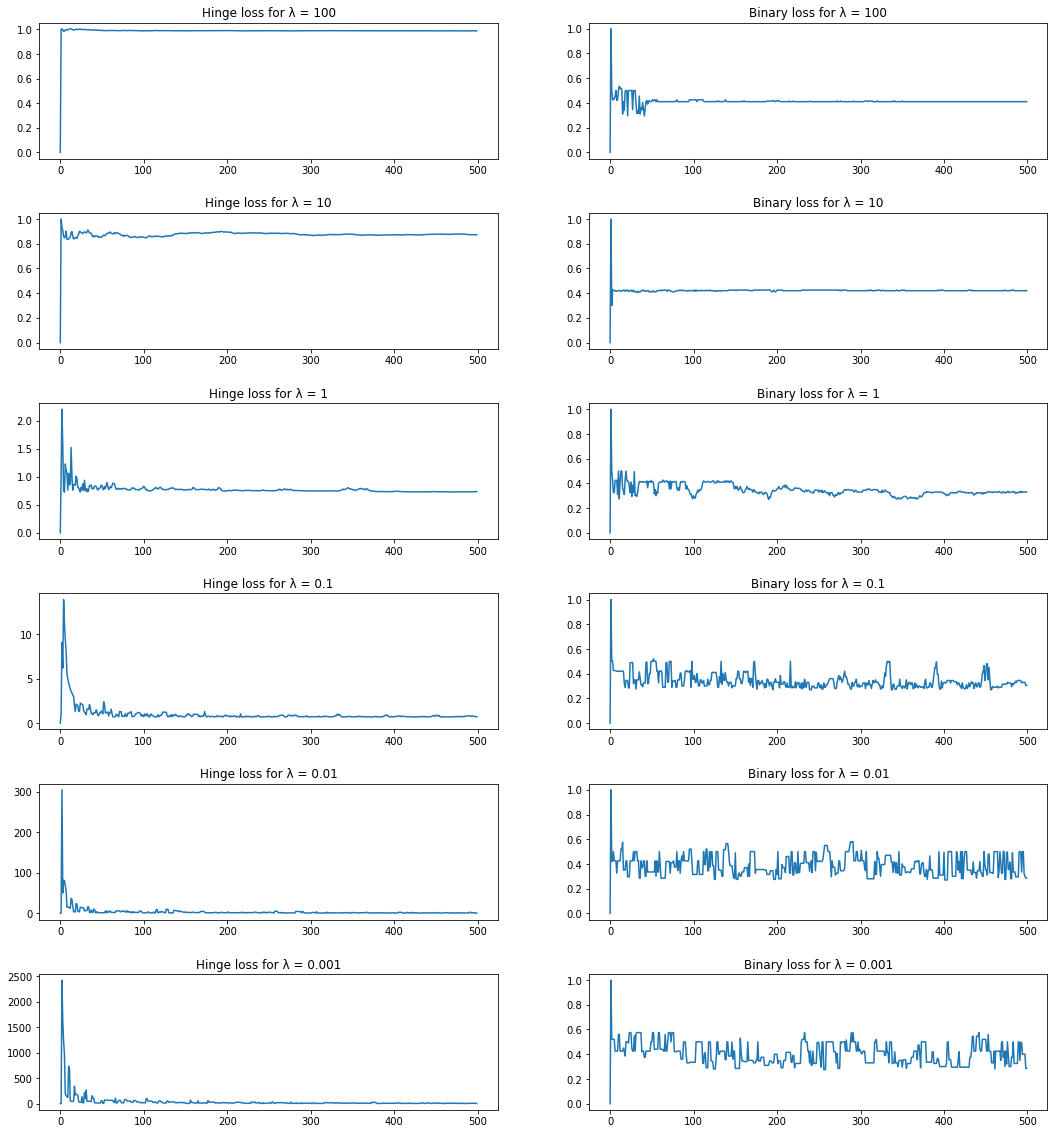

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)
X = np.loadtxt('bg.txt', delimiter=',')
y = np.concatenate((np.ones((100,1), dtype=int),np.ones((100,1), dtype=int)*-1))
Data = np.concatenate((X, np.ones((200,1), dtype=int), y), axis=1)
_lambda = [100, 10, 1, .1, .01, .001]
fig, axs = plt.subplots(len(_lambda), 2)
fig.subplots_adjust(left=0.2, wspace=0.2, hspace = 0.4)
fig.set_size_inches((20, 20))
for idx, val in enumerate(_lambda):
    weights, hloss, bloss = soft_svm(Data, 500, val, 1)
    ax1 = axs[idx, 0]
    ax1.plot(hloss)
    ax1.set_title('Hinge loss for λ = ' + str(val))
    ax2 = axs[idx, 1]
    ax2.plot(bloss)
    ax2.set_title('Binary loss for λ = ' + str(val))
    



## Problem C

A monotonic function is a function which is either entirely nonincreasing or nondecreasing. None of the curves above satisfy this criteria, hence, they are not monotone, especially the Binary loss plots. However, for the hinge loss, the curves approximately monotone (i.e. the hinge loss curves get smaller over iterations). 

Considering that the hinge loss does not run gradient descent, it is not monotone. A gradient estimate at each step is used to update the weights. However, a signle step may go in the negative or positive direction, thus the hinge loss may increase at some iterations but overall it tends to decrease and stabalize after some iterations. Alternatively, the binary loss has no guarantee that as the hinge loss decreases the binary loss will also decrease. For a suitable value of the regularization parameter, we can get less fluctuations but it is not guaranteed in general. Hence, we care more about the binary loss, while miniming a surrogate loss. Therefore, we should output a weight vector of smallest binary loss rather than the weight vector that corresponds to smallest surrogate loss.

According to the plots, a larger regularization parameter (λ) slows down the optimization which generally help with the generalization performance. However, it can also set the weights to far from optimal solution with respect to the binary loss (e.g. Binary and Hinge loss for λ = 100). Alternatively, a small regularization parameter push more
emphasis on the hinge loss minimization. In the case of λ = 0.001, we can observe that the hinge loss is less stable with very large flunctuations in the binary loss.

In this case, I would pick λ = 1 as it provide a middle ground.

## Problem D

In [17]:
def split_data(a, b, c, axis=1, reset=False):
    n = a.shape[1] - 1
    a[:,n] = -1
    b[:,n] = -1
    c[:,n] = -1
    if axis == 1:
        a[:,n] = 1
    elif axis == 2:
        b[:,n] = 1
    else:
        c[:,n] = 1
    if reset:
        a[:,n] = 1
        b[:,n] = 2
        c[:,n] = 3
    return np.concatenate((a,b,c))

X = np.loadtxt('seeds_dataset.txt', delimiter='\t')
N = X.shape[1]
X = np.concatenate((X[:,0:N], np.ones((210,1)) ,X[:,N:N+1]), axis=1)
X1 = X[0:70,:]
X2 = X[70:140,:]
X3 = X[140:210,:]

D = split_data(X1,X2,X3)
W1 = soft_svm(D, iterations, _lambda, 1)
B1 = loss(W1[0], D, binary = True)

D = split_data(X1,X2,X3, axis=2)
W2 = soft_svm(D, iterations, _lambda, 1)
B2 = loss(W2[0], D, binary = True)

D = split_data(X1,X2,X3, axis=3)
W3 = soft_svm(D, iterations, _lambda, 1)
B3 = loss(W3[0], D, binary = True)

print(f'Binary loss for W1: {B1}')
print(f'Binary loss for W2: {B2}')
print(f'Binary loss for W3: {B3}')

Binary loss for W1: 0.3333333333333333
Binary loss for W2: 0.2619047619047619
Binary loss for W3: 0.19523809523809524


## Problem E

In [11]:
def OvA(W1,W2,W3,Xi):
    D1 = np.dot(W1,Xi)
    D2 = np.dot(W2,Xi)
    D3 = np.dot(W3,Xi)
    if D1 > D2 and D1 > D3:
        return 1
    elif D2 > D1 and D2 > D3:
        return 2
    elif D3 > D1 and D3 > D2:
        return 3
    
_lambda = 0.1
iterations = 300
X = np.loadtxt('seeds_dataset.txt', delimiter='\t')
X = np.concatenate((X[:,0:N-1], np.ones((210,1)) ,X[:,N-1:N]), axis=1)
min_s = 0
mc = 0
wsmin = np.zeros((3, N))
lbinmin = np.zeros((3, 1))
for a in range(100):
    D = split_data(X1,X2,X3)
    W1, _, B1 = soft_svm(D, iterations, _lambda, 1)
    D = split_data(X1,X2,X3, axis=2)
    W2, _, B2 = soft_svm(D, iterations, _lambda, 1)
    D = split_data(X1,X2,X3, axis=3)
    W3, _, B3 = soft_svm(D, iterations, _lambda, 1)
    WR = np.ones((210,1), dtype=np.float)
    for i in range(X.shape[0]):
        Xi = X[i,0:N]
        Mi = OvA(W1,W2,W3,Xi)
        WR[i,0] = Mi
    WR = X[:, N] == WR[:,0]
    mc = sum(WR) / X.shape[0]
    if mc > min_s:
        min_s = mc 
        wsmin[0,:] = W1
        wsmin[1,:] = W2
        wsmin[2,:] = W3
        lbinmin[0,0] = B1[B1.shape[0]-1,0]
        lbinmin[1,0] = B2[B2.shape[0]-1,0]
        lbinmin[2,0] = B3[B3.shape[0]-1,0]

##### In this section, I trained three SoftSVMs with 3 seperate classes (as described in the assignment), the resulting multi-class error is ~90% on the training dataset.